### **CARGUE DE LIBRERIAS**

In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns  # Adicional para gráficos más complejos
style.use('ggplot') or plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (12,10)

# Preprocesado y modelado
# ==============================================================================
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score, silhouette_samples
!pip install prince
import prince  # Análisis de correspondencias (AC y ACM)

# Red neuronal y procesamiento de imágenes
# ==============================================================================
from google.colab import files
import os
import zipfile
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# Kaggle para descargar datasets
!pip install kaggle

# Aplicativo (Streamlit y Ngrok)
# ==============================================================================
!pip install streamlit
!pip install pyngrok
from pyngrok import ngrok

# Funciones de visualización en Colab
# ==============================================================================
from IPython.display import display, Image, Javascript
from google.colab.output import eval_js
from base64 import b64decode

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.8/415.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 116.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


# **PREPARACION Y LIMPIEZA DE DATOS**

### **CARGUE DE DATOS**

Seleccionar el archivo Datos Receptivo.xlsx

In [ ]:
# Lectura de datos
from google.colab import files
uploaded = files.upload()

Saving Datos Receptivo.xlsx to Datos Receptivo.xlsx


Cargar los datos

In [ ]:
#Cargue de datos
df = pd.read_excel('Datos Receptivo.xlsx')

In [ ]:
#Visualizacion de la base
pd.option_context('display.max_columns', None)
df.head()

,Genero,Visita a centros comerciales,Recorrer calles y parques del casco urbano,"Visita a museos / casas de la cultura / iglesias, santuarios y monumentos.",Haciendas y/o casas historicas,Actividades religiosas,Asistencia a espectaculos artisticos y festivales,Avistamiento de Aves,Avistamiento de Ballenas,Visita a discotecas; bares; karaoke,...,"Actividades de aventura (Rappel, parapente, bungee, escalada, espelelismo, canotaje)",Senderismo (caminatas),Reservas/parques,Playas,Otro,Asistir a Boda/Primera comunión/15 años/ bautizo entre otros.,Visita a familiares/Amigos,Actividades gastronómicas,Procedencia,Rango edad
0,Masculino,1.0,1.0,NaN,0.0,1.0,0.0,0.0,NaN,0.0,...,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,Nacional,39-50
1,Femenino,0.0,0.0,NaN,0.0,1.0,0.0,0.0,NaN,0.0,...,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,Nacional,39-50
2,Masculino,0.0,0.0,NaN,0.0,1.0,0.0,0.0,NaN,0.0,...,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,Nacional,15-26
3,Femenino,0.0,0.0,1.0,0.0,1.0,0.0,0.0,NaN,0.0,...,NaN,0,0.0,0.0,1.0,0.0,0.0,0.0,Nacional,27-38
4,Masculino,0.0,1.0,NaN,0.0,1.0,0.0,0.0,NaN,0.0,...,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,Nacional,27-38


In [ ]:
# Informacion de las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48818 entries, 0 to 48817
Data columns (total 34 columns):
 #   Column                                                                                Non-Null Count  Dtype  
---  ------                                                                                --------------  -----  
 0   Genero                                                                                48453 non-null  object 
 1   Visita a centros comerciales                                                          43281 non-null  float64
 2   Recorrer calles y parques del casco urbano                                            44147 non-null  float64
 3   Visita a museos / casas de la cultura / iglesias, santuarios y monumentos.            40183 non-null  float64
 4   Haciendas y/o casas historicas                                                        39833 non-null  float64
 5   Actividades religiosas                                                           

In [ ]:
#Valores unicos de las variables
df.nunique()

,0
Genero,2
Visita a centros comerciales,2
Recorrer calles y parques del casco urbano,2
"Visita a museos / casas de la cultura / iglesias, santuarios y monumentos.",2
Haciendas y/o casas historicas,2
Actividades religiosas,6
Asistencia a espectaculos artisticos y festivales,2
Avistamiento de Aves,2
Avistamiento de Ballenas,2
Visita a discotecas; bares; karaoke,2


In [ ]:
# Lista de columnas con menos de 13 valores distintos. Potenciales factores
to_factor = list(df.loc[:,df.nunique() <= 13]);

# Podemos cambiar el tipo de todas ellas a factor de una vez
df[to_factor] = df[to_factor].astype('category')

In [ ]:
# Informacion de las variables despues de transofrmadas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48818 entries, 0 to 48817
Data columns (total 34 columns):
 #   Column                                                                                Non-Null Count  Dtype   
---  ------                                                                                --------------  -----   
 0   Genero                                                                                48453 non-null  category
 1   Visita a centros comerciales                                                          43281 non-null  category
 2   Recorrer calles y parques del casco urbano                                            44147 non-null  category
 3   Visita a museos / casas de la cultura / iglesias, santuarios y monumentos.            40183 non-null  category
 4   Haciendas y/o casas historicas                                                        39833 non-null  category
 5   Actividades religiosas                                                    

### **LIMPIEZA DE DATOS**

Vamos a ver en primera mano las variables con las que vamos a trabajar que son las actividades, el genero, el rango de edad y la procedencia. Inicialmente sabemos cuantos valores distintos deben de haber en cada una de estas variables, por lo que en algunas actividades se puede ver que existe mas de 2 categorias y se debe proceder a limpiar esta parte.

In [ ]:
actividades_columns = df.columns[1:31]
for col in actividades_columns:
    print(f"Activity: {col}")
    print(f"Unique values: {df[col].unique()}")

Activity: Visita a centros comerciales
Unique values: [1.0, 0.0, NaN]
Categories (2, float64): [0.0, 1.0]
Activity: Recorrer calles y parques del casco urbano
Unique values: [1.0, 0.0, NaN]
Categories (2, float64): [0.0, 1.0]
Activity: Visita a museos / casas de la cultura / iglesias, santuarios y monumentos.
Unique values: [NaN, 1.0, 0.0]
Categories (2, float64): [0.0, 1.0]
Activity: Haciendas y/o casas historicas
Unique values: [0.0, 1.0, NaN]
Categories (2, float64): [0.0, 1.0]
Activity: Actividades religiosas
Unique values: [1.0, 0.0, 3.0, 2.0, 10.0, 40.0, NaN]
Categories (6, float64): [0.0, 1.0, 2.0, 3.0, 10.0, 40.0]
Activity: Asistencia a espectaculos artisticos y festivales
Unique values: [0.0, 1.0, NaN]
Categories (2, float64): [0.0, 1.0]
Activity: Avistamiento de Aves
Unique values: [0.0, 1.0, NaN]
Categories (2, float64): [0.0, 1.0]
Activity: Avistamiento de Ballenas
Unique values: [NaN, 0.0, 1.0]
Categories (2, float64): [0.0, 1.0]
Activity: Visita a discotecas; bares; karao

Todas las actividades con mas de 2 categorias se le pondra NaN a las categorias diferentes de 0 y 1

In [ ]:
for col in df.columns[1:31]:
    unique_values = df[col].unique()

    # Verificar si la columna tiene más de 2 categorías
    if len(unique_values) > 3:
        # Reemplazar los valores que no son 0 o 1 con NaN
        df[col] = df[col].apply(lambda x: x if x in [0, 1, np.nan] else np.nan)

### **TRATAMIENTO DE VALORES NULOS**

In [ ]:
#Tratamiento de valores nulos
df.isnull().sum()

,0
Genero,365
Visita a centros comerciales,5537
Recorrer calles y parques del casco urbano,4671
"Visita a museos / casas de la cultura / iglesias, santuarios y monumentos.",8635
Haciendas y/o casas historicas,8985
Actividades religiosas,8527
Asistencia a espectaculos artisticos y festivales,8666
Avistamiento de Aves,9161
Avistamiento de Ballenas,12301
Visita a discotecas; bares; karaoke,7670


Las actvidades que tuvieras vacios se procedio a rellenar con 0 ya que en este caso si el encuestador dejaba vacio era porque el visitante no realizo la actividad. Por lo que 0 significa que no resulto la actividad y 1 que si la hizo. En cuanto a Rango de edad y Genero se procedio a eliminar los vacios para no generar mas ruido en los datos.

In [ ]:
#Imputacion de datos

#Actividades que realizan los turistas en el valle, todos los vacios imputar con 0
actividades = df.columns[1:32]
df.loc[:,actividades]=df.loc[:,actividades].fillna(0)

# Variables objetivos
columnas_a_imputar = ['Rango edad', 'Genero']

# Eliminar las filas que tengan valores NaN en las columnas especificadas
df = df.dropna(subset=columnas_a_imputar)

In [ ]:
#Evidencia de que no queden valores nulos
df.isnull().sum()

,0
Genero,0
Visita a centros comerciales,0
Recorrer calles y parques del casco urbano,0
"Visita a museos / casas de la cultura / iglesias, santuarios y monumentos.",0
Haciendas y/o casas historicas,0
Actividades religiosas,0
Asistencia a espectaculos artisticos y festivales,0
Avistamiento de Aves,0
Avistamiento de Ballenas,0
Visita a discotecas; bares; karaoke,0


Despues del trtamiendo de valores nulos se quedo con un base de 46,109 datos para el posterior analisis

In [ ]:
df

,Genero,Visita a centros comerciales,Recorrer calles y parques del casco urbano,"Visita a museos / casas de la cultura / iglesias, santuarios y monumentos.",Haciendas y/o casas historicas,Actividades religiosas,Asistencia a espectaculos artisticos y festivales,Avistamiento de Aves,Avistamiento de Ballenas,Visita a discotecas; bares; karaoke,...,"Actividades de aventura (Rappel, parapente, bungee, escalada, espelelismo, canotaje)",Senderismo (caminatas),Reservas/parques,Playas,Otro,Asistir a Boda/Primera comunión/15 años/ bautizo entre otros.,Visita a familiares/Amigos,Actividades gastronómicas,Procedencia,Rango edad
0,Masculino,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Nacional,39-50
1,Femenino,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Nacional,39-50
2,Masculino,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Nacional,15-26
3,Femenino,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Nacional,27-38
4,Masculino,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Nacional,27-38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48813,Femenino,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,Nacional,27-38
48814,Femenino,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Extranjero,15-26
48815,Femenino,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Extranjero,15-26
48816,Masculino,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Extranjero,27-38


### **ESTADISTICAS DESCRIPTIVAS**

In [ ]:


# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Obtenemos el análisis descriptivo general de todas las columnas categóricas
descriptive_table = df.describe(include='category')

# Mostrar la tabla descriptiva
descriptive_table





,Genero,Visita a centros comerciales,Recorrer calles y parques del casco urbano,"Visita a museos / casas de la cultura / iglesias, santuarios y monumentos.",Haciendas y/o casas historicas,Asistencia a espectaculos artisticos y festivales,Avistamiento de Aves,Avistamiento de Ballenas,Visita a discotecas; bares; karaoke,Visita a parque tematicos/parque de atracciones,Compra de bienes de consumo duradero,Realizar inversión/reunión de negocio,Practica de deportes,Asistencia a competencias o muestras deportivas,Asistencia a fiestas y ferias de pueblos municipios,Visita a fabricas/haciendas,Visita a casinos y otros sitios de juegos de azar,"Visita a ríos, lagos y cascadas.",Miradores paisajisticos,Zoologicos,Proceso del Café,Proceso del Azucar Dulce,"Actividades de aventura (Rappel, parapente, bungee, escalada, espelelismo, canotaje)",Reservas/parques,Playas,Otro,Asistir a Boda/Primera comunión/15 años/ bautizo entre otros.,Visita a familiares/Amigos,Actividades gastronómicas,Procedencia,Rango edad
count,46109,46109.0,46109.0,46109.0,46109.0,46109.0,46109.0,46109.0,46109.0,46109.0,46109.0,46109.0,46109.0,46109.0,46109.0,46109.0,46109.0,46109.0,46109.0,46109.0,46109.0,46109.0,46109.0,46109.0,46109.0,46109.0,46109.0,46109.0,46109.0,46109,46109
unique,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,5
top,Femenino,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Nacional,27-38
freq,23658,30248.0,24490.0,34671.0,43151.0,43777.0,45226.0,43775.0,41818.0,44531.0,45774.0,44695.0,45002.0,45221.0,45536.0,45930.0,45870.0,38137.0,40900.0,43820.0,45778.0,45884.0,45569.0,44043.0,40862.0,43685.0,45844.0,44563.0,44592.0,42905,18401


Se descarga la base completa df despues haberle hecho el respectivo procesamiento y tratamiendo ya que posterior a esto vamos a trabajar el analisis de correspondencia desde la extension de R aqui en google collab. Por lo que vamos a descargarla como base_cluster para podterior leerla en el lenguaje de R.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Exportar la base para cargarla en un espacio de R
df.to_excel('base_cluster.xlsx')

# **ANALISIS DE CORRESPONDENCIA**

El analisis de correspondencia se realizo en lenguaje R ya que el paquete FactorMineR tiene la herramienta de analisis de correspondencia mucho mas puntual. Por lo tanto se deben de descargar las siguientes extensiones para que se pueda trabajar co R aqui en google collab.

In [ ]:
# Instalar R en Google Colab
!apt-get install r-base -y

# Instalar rpy2 para permitir la ejecución de código R en Google Colab
!pip install rpy2
# Cargar la extensión R en Google Colab
%load_ext rpy2.ipython


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.1-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


(as ‘lib’ is unspecified)







	‘/tmp/Rtmp32cSPV/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmp32cSPV/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmp32cSPV/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/Rtmp32cSPV/downloaded_packages’



New names:
• `` -> `...1`
       
          y1   y2   y3   y4   y5   y6   y7   y8   y9  y10  y11  y12  y13  y14
  15-26    0 2432 3364 1638  328  858  587  153  515  933  387   36  111  378
  27-38    0 6316 8273 4440 1050 2765  999  375 1132 1943  637  116  601  454
  39-50    1 4619 6126 3228  779 2539  456  232  502  934  360   98  517  189
  51-62    0 1859 2780 1534  586 1352  205   86  156  397  140   67  161   63
  63+      0  635 1076  598  215  564   85   37   29   84   54   18   24   23
       
         y15  y16  y17  y18  y19  y20  y21  y22  y23  y24  y25  y26  y27  y28
  15-26  276   77  119   26   47 1762 1038  511   78   46  171  284  418 1253
  27-38  371  300  229   74  109 3051 2034  936  113   91  227  644  976 2683
  39-50  163  153  122   61   53 1948 1328  564   74   50   99  339  448  982
  51-62   64   42   77   13   25  854  601  193   46   23   31  187  163  269
  63+     14    8   26    5    5  357  208   85   20   15   12   63   61   60
       
         y29  

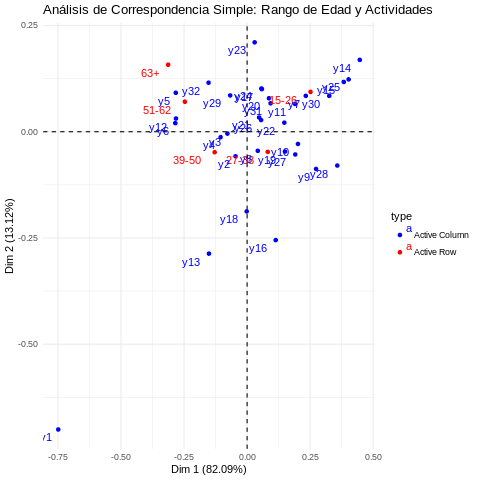

In [ ]:
%%R

# Instalar y cargar paquetes necesarios
install.packages("reshape2")
install.packages("FactoMineR")
install.packages("ggplot2")
install.packages("readxl")
library(readxl)
library(reshape2)
library(FactoMineR)
library(ggplot2)

base_cluster <- read_excel('/content/base_cluster.xlsx')
# Convertir la base de datos a formato largo
actividades <- setdiff(names(base_cluster), c("Rango edad", "Genero", "Procedencia"))
base_long <- melt(base_cluster, id.vars = "Rango edad", measure.vars = actividades)
base_long <- base_long[base_long$value == 1, ]

# Crear la tabla de contingencia
combined_table <- table(base_long$`Rango edad`, base_long$variable)
colnames(combined_table) <- paste0("y", 1:ncol(combined_table))

# Mostrar la tabla de contingencia
print(combined_table)

# Realizar el análisis de correspondencias
ca_result <- CA(combined_table, graph = FALSE)

# Ver los resultados
summary(ca_result)

# Gráfico de variables activas
plot(ca_result, invisible = "row")

# Extraer coordenadas de las variables activas
active_rows <- ca_result$row$coord
active_cols <- ca_result$col$coord

# Agregar etiquetas
active_rows <- data.frame(active_rows, label = rownames(active_rows), type = "Active Row")
active_cols <- data.frame(active_cols, label = rownames(active_cols), type = "Active Column")

# Unir los data frames
df_combined <- rbind(active_rows, active_cols)

# Gráfico combinado
ggplot(df_combined, aes(x = Dim.1, y = Dim.2, color = type, label = label)) +
  geom_point() +
  geom_text(vjust = 1.5, hjust = 1.5) +
  theme_minimal() +
  ggtitle("Análisis de Correspondencia Simple: Rango de Edad y Actividades") +
  xlab(paste0("Dim 1 (", round(ca_result$eig[1, 2], 2), "%)")) +
  ylab(paste0("Dim 2 (", round(ca_result$eig[2, 2], 2), "%)")) +
  geom_hline(yintercept = 0, linetype = "dashed") +
  geom_vline(xintercept = 0, linetype = "dashed") +
  scale_color_manual(values = c("blue", "red"))

Asignacion de actividades por rango de edad, ya que esta sera nuestra variable a modelar en la red neuronal para realizar las recomendaciones.

In [ ]:
%%R
# Calcular distancias entre cada actividad y cada rango de edad
distances <- as.matrix(dist(df_combined[, c("Dim.1", "Dim.2")]))

# Filtrar las filas correspondientes a los rangos de edad
age_rows <- rownames(df_combined[df_combined$type == "Active Row", ])

# Filtrar las columnas correspondientes a las actividades
activity_cols <- rownames(df_combined[df_combined$type == "Active Column", ])

# Crear un dataframe para almacenar la asociación de actividades con rangos de edad
activity_age_association <- data.frame(Activity = character(), Rango_Edad = character())

# Asignar cada actividad al rango de edad más cercano
for (activity in activity_cols) {
  closest_age <- age_rows[which.min(distances[activity, age_rows])]
  activity_age_association <- rbind(activity_age_association, data.frame(Activity = activity, Rango_Edad = closest_age))
}

# Mostrar las asociaciones
print(activity_age_association)
# Exportar la tabla `activity_age_association` a CSV
write.csv(activity_age_association, "/content/activity_age_association.csv", row.names = TRUE)


   Activity Rango_Edad
1        y1      39-50
2        y2      39-50
3        y3      39-50
4        y4      39-50
5        y5      51-62
6        y6      51-62
7        y7      15-26
8        y8      27-38
9        y9      15-26
10      y10      27-38
11      y11      15-26
12      y12      51-62
13      y13      39-50
14      y14      15-26
15      y15      15-26
16      y16      27-38
17      y17      27-38
18      y18      27-38
19      y19      27-38
20      y20      27-38
21      y21      27-38
22      y22      27-38
23      y23      15-26
24      y24      27-38
25      y25      15-26
26      y26      27-38
27      y27      27-38
28      y28      15-26
29      y29      39-50
30      y30      15-26
31      y31      27-38
32      y32      51-62


Analisis de correspondencia Genero y Actividades

           
               y1    y2    y3    y4    y5    y6    y7    y8    y9   y10   y11
  Femenino      1  8311 11081  5958  1547  4324  1229   433  1338  2039   806
  Masculino     0  7550 10538  5480  1411  3754  1103   450   996  2252   772
           
              y12   y13   y14   y15   y16   y17   y18   y19   y20   y21   y22
  Femenino    131   389   406   365   257   269    71   109  4116  2712  1240
  Masculino   204  1025   701   523   323   304   108   130  3856  2497  1049
           
              y23   y24   y25   y26   y27   y28   y29   y30   y31   y32
  Femenino    143   115   242   720  1001  2955  1193   148   820   793
  Masculino   188   110   298   797  1065  2292  1231   117   726   724


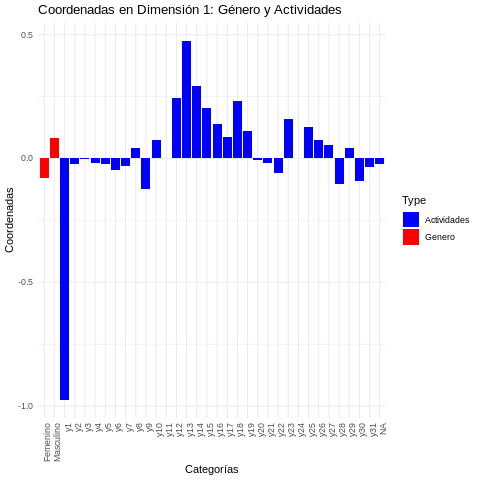

In [ ]:
%%R
actividades <- setdiff(names(base_cluster), c("Rango edad", "Genero", "Procedencia"))
base_long <- melt(base_cluster, id.vars = "Genero", measure.vars = actividades)
base_long <- base_long[base_long$value == 1, ]

# Crear la tabla de contingencia
combined_table <- table(base_long$`Genero`, base_long$variable)
colnames(combined_table) <- paste0("y", 1:ncol(combined_table))

# Mostrar la tabla de contingencia
print(combined_table)

# Realizar el análisis de correspondencias
library(FactoMineR)
ca_result <- CA(combined_table, graph = FALSE)

##Inercia
ca_result$eig
# Extraer coordenadas como vectores
row_coords <- as.vector(ca_result$row$coord)  # Coordenadas para Procedencia
col_coords <- as.vector(ca_result$col$coord)  # Coordenadas para Actividades


# Crear DataFrame para Procedencia
df_procedencia <- data.frame(
  Coords = row_coords,
  Type = "Genero",
    Label = c("Femenino", "Masculino")  # Etiquetas manuales para procedencia
)

# Crear DataFrame para Actividades
df_actividades <- data.frame(
  Coords = col_coords,
  Type = "Actividades",
  Label = paste0("y", 1:length(col_coords))  # Etiquetas automáticas para actividades
)

# Combinar ambos DataFrames
df_combined <- rbind(df_procedencia, df_actividades)


# Convertir las etiquetas a un factor con el orden numérico deseado
df_combined$Label <- factor(df_combined$Label, levels = c("Femenino", "Masculino", paste0("y", 1:31)))

ggplot(df_combined, aes(x = Label, y = Coords, fill = Type)) +
  geom_bar(stat = "identity", position = "dodge") +
  theme_minimal() +
  labs(title = "Coordenadas en Dimensión 1: Género y Actividades", x = "Categorías", y = "Coordenadas") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  scale_fill_manual(values = c("Genero" = "red", "Actividades" = "blue"))



Analisis de Correspondencia Procedencia y Actividades

            
                y1    y2    y3    y4    y5    y6    y7    y8    y9   y10   y11
  Extranjero     0  1532  1957  1283   285   486   303   120    73   740   179
  Nacional       1 14329 19662 10155  2673  7592  2029   763  2261  3551  1399
            
               y12   y13   y14   y15   y16   y17   y18   y19   y20   y21   y22
  Extranjero    41   112   124    92    48    67    11    52   817   499   381
  Nacional     294  1302   983   796   532   506   168   187  7155  4710  1908
            
               y23   y24   y25   y26   y27   y28   y29   y30   y31   y32
  Extranjero    35    39    63   144   209   124   108    12   116   171
  Nacional     296   186   477  1373  1857  5123  2316   253  1430  1346
          Coords        Type      Label
1   0.3329077608 Procedencia   Nacional
2  -0.0348653974 Procedencia Extranjero
3  -0.3236199975 Actividades         y1
4   0.0061027876 Actividades         y2
5  -0.0146075431 Actividades         y3
6   0.0592905449 Actividades

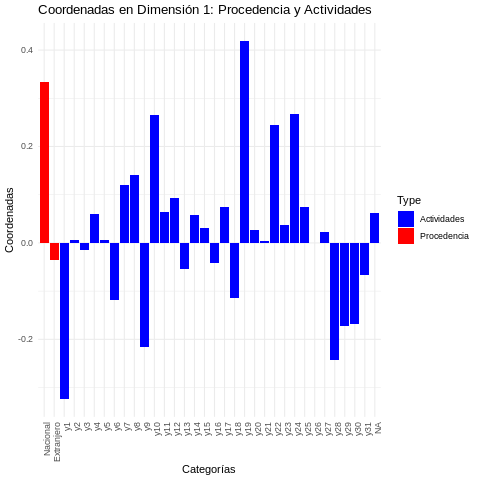

In [ ]:
%%R

actividades <- setdiff(names(base_cluster), c("Rango edad", "Genero", "Procedencia"))
base_long <- melt(base_cluster, id.vars = "Procedencia", measure.vars = actividades)
base_long <- base_long[base_long$value == 1, ]

# Crear la tabla de contingencia
combined_table <- table(base_long$Procedencia, base_long$variable)
colnames(combined_table) <- paste0("y", 1:ncol(combined_table))

# Mostrar la tabla de contingencia
print(combined_table)

# Realizar el análisis de correspondencias
library(FactoMineR)
ca_result <- CA(combined_table, graph = FALSE)

##Inercia
ca_result$eig

# Extraer coordenadas como vectores
row_coords <- as.vector(ca_result$row$coord)  # Coordenadas para Procedencia
col_coords <- as.vector(ca_result$col$coord)  # Coordenadas para Actividades


# Crear DataFrame para Procedencia
df_procedencia <- data.frame(
  Coords = row_coords,
  Type = "Procedencia",
  Label = c("Nacional", "Extranjero")  # Etiquetas manuales para procedencia
)

# Crear DataFrame para Actividades
df_actividades <- data.frame(
  Coords = col_coords,
  Type = "Actividades",
  Label = paste0("y", 1:length(col_coords))  # Etiquetas automáticas para actividades
)

# Combinar ambos DataFrames
df_combined <- rbind(df_procedencia, df_actividades)


# Verificar el DataFrame combinado
print(df_combined)

library(ggplot2)

# Convertir las etiquetas a un factor con el orden numérico deseado
df_combined$Label <- factor(df_combined$Label, levels = c("Nacional", "Extranjero", paste0("y", 1:31)))

# Crear el gráfico con ggplot2
ggplot(df_combined, aes(x = Label, y = Coords, fill = Type)) +
  geom_bar(stat = "identity", position = "dodge") +
  theme_minimal() +
  labs(title = "Coordenadas en Dimensión 1: Procedencia y Actividades", x = "Categorías", y = "Coordenadas") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  scale_fill_manual(values = c("Procedencia" = "red", "Actividades" = "blue"))


# **RED NEURONAL**

Importar el archivo kaggle.json que los descargamos desde la app de kaggle.

In [ ]:
from google.colab import files
import os
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alejandraoteroleyton","key":"ba4d62e3e89af93095ff1433a4a65548"}'}

Mover el archivo kaggle.jso al directorio y descargar el dataset utkface-new

In [ ]:
os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')
!kaggle datasets download -d jangedoo/utkface-new

Dataset URL: https://www.kaggle.com/datasets/jangedoo/utkface-new
License(s): copyright-authors
100% 331M/331M [00:14<00:00, 32.1MB/s]
100% 331M/331M [00:14<00:00, 23.6MB/s]


Descomprimir el archivo utkface-new.zip en la ruta /content/UTKFace/

In [ ]:
import zipfile

zip_path = '/content/utkface-new.zip'
extract_path = '/content/UTKFace/'

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

Mostrar el contenido de las tres carpetas en el directorio UTKFace, incluyendo el número total de archivos y los primeros 10 archivos de cada carpeta. Al final solo trabajaremos con los archivos de la carpeta UTKFace

In [ ]:
import os

# Definir las rutas de las carpetas
base_path = '/content/UTKFace/'
folders = ['crop_part1', 'utkface_aligned_cropped', 'UTKFace']

# Verificar contenido de cada carpeta
for folder in folders:
    folder_path = os.path.join(base_path, folder)
    files = os.listdir(folder_path)
    print(f"Carpeta: {folder}")
    print(f"Total de archivos en la carpeta: {len(files)}")
    print(files[:10])  # Mostrar los primeros 10 archivos para verificar
    print()

# Ruta a la carpeta 'UTKFace'
utkface_path = '/content/UTKFace/UTKFace'
files = os.listdir(utkface_path)

print(f"Total de archivos en la carpeta 'UTKFace': {len(files)}")
print(files[:10])  # Mostrar los primeros 10 archivos para verificar


Carpeta: crop_part1
Total de archivos en la carpeta: 9780
['1_0_2_20161219204012884.jpg.chip.jpg', '26_0_0_20170103181224784.jpg.chip.jpg', '16_1_0_20170109204349968.jpg.chip.jpg', '16_0_0_20170110225310813.jpg.chip.jpg', '65_0_0_20170111202227430.jpg.chip.jpg', '1_1_2_20161219211002173.jpg.chip.jpg', '3_1_0_20170109193021650.jpg.chip.jpg', '27_1_0_20170109013152498.jpg.chip.jpg', '85_0_0_20170111205957066.jpg.chip.jpg', '2_1_4_20170103210946139.jpg.chip.jpg']

Carpeta: utkface_aligned_cropped
Total de archivos en la carpeta: 2
['UTKFace', 'crop_part1']

Carpeta: UTKFace
Total de archivos en la carpeta: 23708
['1_0_2_20161219204012884.jpg.chip.jpg', '48_0_0_20170117140647918.jpg.chip.jpg', '55_1_0_20170117200221382.jpg.chip.jpg', '26_0_0_20170103181224784.jpg.chip.jpg', '16_1_0_20170109204349968.jpg.chip.jpg', '38_1_0_20170116021831453.jpg.chip.jpg', '19_1_0_20170112231655238.jpg.chip.jpg', '25_1_1_20170117142659506.jpg.chip.jpg', '31_0_2_20170116191346864.jpg.chip.jpg', '16_0_0_201701

Entrenamiento del Modelo

In [ ]:
import numpy as np
import cv2
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# Cargar las imágenes y las edades
images = []
ages = []

for file in files:
    img_path = os.path.join(utkface_path, file)
    image = cv2.imread(img_path)
    if image is not None:
        # Redimensionar y normalizar la imagen
        image = cv2.resize(image, (128, 128))
        image = image / 255.0  # Normalizar los valores de píxel al rango [0, 1]
        images.append(image)

        # Extraer edad del nombre del archivo
        split_var = file.split('_')
        ages.append(int(split_var[0]))

# Convertir listas a arrays de NumPy
images = np.array(images)
ages = np.array(ages)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(images, ages, test_size=0.2, random_state=42)

# Dividir el conjunto de entrenamiento en un conjunto de entrenamiento y un conjunto de validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Aumentación de datos y preprocesamiento
datagen_train = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

datagen_val = ImageDataGenerator()  # No se aplica aumento a los datos de validación

datagen_train.fit(X_train)
datagen_val.fit(X_val)

# Crear el modelo con más complejidad
model = Sequential([
    Conv2D(64, (5, 5), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Regularización para prevenir sobreajuste
    Dense(1)  # Una sola neurona para la salida (edad)
])

model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])

# Implementar Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo usando el generador de datos aumentado
history = model.fit(
    datagen_train.flow(X_train, y_train, batch_size=32),
    validation_data=datagen_val.flow(X_val, y_val),
    epochs=50,
    callbacks=[early_stopping]
)

# Evaluar el modelo
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=2)
print(f'Test MAE: {test_mae:.2f}')

# Guardar el modelo entrenado
model.save('age_prediction_model.h5')

Epoch 1/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 57s 112ms/step - loss: 17.3665 - mae: 17.3665 - val_loss: 14.7311 - val_mae: 14.7311
Epoch 2/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 52s 109ms/step - loss: 15.6659 - mae: 15.6659 - val_loss: 13.5869 - val_mae: 13.5869
Epoch 3/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 52s 109ms/step - loss: 15.0553 - mae: 15.0553 - val_loss: 13.4344 - val_mae: 13.4344
Epoch 4/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 52s 108ms/step - loss: 14.8975 - mae: 14.8975 - val_loss: 13.5777 - val_mae: 13.5777
Epoch 5/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 52s 109ms/step - loss: 14.4252 - mae: 14.4252 - val_loss: 12.6726 - val_mae: 12.6726
Epoch 6/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 52s 109ms/step - loss: 14.0665 - mae: 14.0665 - val_loss: 12.8464 - val_mae: 12.8464
Epoch 7/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 53s 109ms/step - loss: 13.6663 - mae: 13.6663 - val_loss: 12.8876 - val_mae: 12.8876
Epoch 8/50
475/475 ━━━━━━━━━━━━━━━━━━━━ 52s 108ms/step - loss: 13.4989 - mae: 13.4989 - val_loss: 11.9435 - val_mae: 11.9435


Test MAE: 7.84


Indicadores de rendimiento, loss y mae durante las epocas

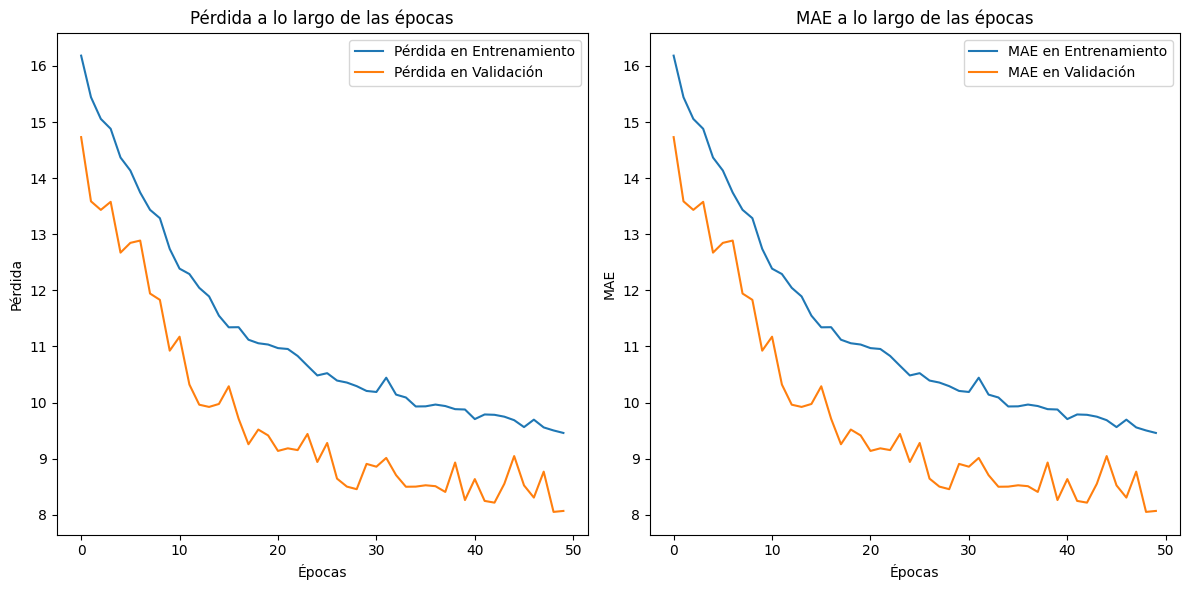

In [ ]:
import matplotlib.pyplot as plt

# Graficar la pérdida (loss) y el MAE en función de las épocas
def plot_training_history(history):
    # Gráfica de loss
    plt.figure(figsize=(12, 6))

    # Gráfico de la pérdida (loss)
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Pérdida en Entrenamiento')
    plt.plot(history.history['val_loss'], label='Pérdida en Validación')
    plt.title('Pérdida a lo largo de las épocas')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()

    # Gráfico del MAE
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='MAE en Entrenamiento')
    plt.plot(history.history['val_mae'], label='MAE en Validación')
    plt.title('MAE a lo largo de las épocas')
    plt.xlabel('Épocas')
    plt.ylabel('MAE')
    plt.legend()

    # Mostrar las gráficas
    plt.tight_layout()
    plt.show()

# Llamar a la función para graficar la historia de entrenamiento
plot_training_history(history)


Aqui se descargo el modelo en mi pc desde la carpeta en donde se guardo para simplemente no correrlo mas y no gastar tantas unidades de computo.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import files

# Guardar el modelo
model.save('age_prediction_model.h5')
# Descargar el modelo
files.download('age_prediction_model.h5')

Mounted at /content/drive


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Subir el modelo descargado si no quieres volverlo a correr

In [ ]:
from google.colab import files
uploaded = files.upload()  # Esto te permitirá subir el archivo .h5 desde tu computadora

Saving activity_age_association.csv to activity_age_association.csv


# Aplicativo para recomedacion de actividades basada en la edad

Al correr este codigo, te debes de tomar una foto. Por lo que tienes que permitir a tu camara web que pueda acceder a google colab. Una vez tomada la foto el modelo te predice la edad, te asigna a un rango de edad y se te recomendara las actividades que puedes hacer en el valle del cauca. De igul manera por cada actividad puedes encontrar un link en donde puedes encontrar todos los sitios mas puntuales que puedes visitar

<IPython.core.display.Javascript object>

Saved to photo.jpg


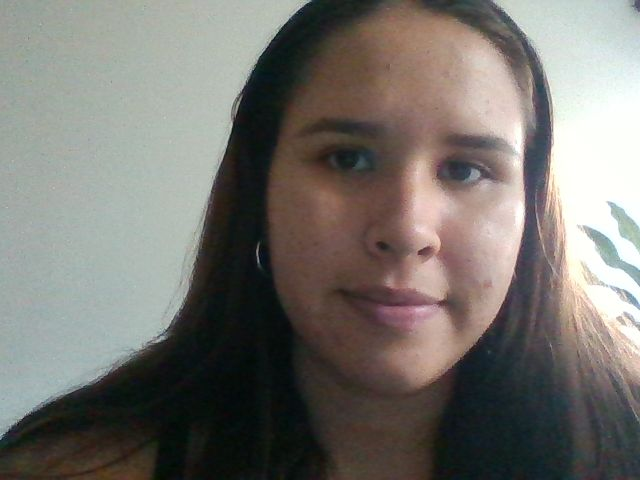

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
Predicted age: 29.33
Assigned age range: 27-38
Activities:
- Te recomiendo realizar avistamiento de ballenas en el Valle. Para más información sobre el avistamiento de ballenas, puedes visitar esta página: [Avistamiento de Ballenas - Información y Reservas](https://avistamientodeballenas.co/).
- Visita los parques temáticos o parques de atracciones del departamento. Para más información, puedes visitar esta página: [Tripadvisor - Parques Temáticos y de Atracciones en el Valle del Cauca](https://www.tripadvisor.es/Attractions-g2021548-Activities-c52-t98-Valle_del_Cauca_Department.html).
- Te recomiendo asistir a fiestas y ferias de las ciudades del departamento. ara más información sobre las ferias y fiestas, puedes visitar esta página: [Viaja por Colombia - Ferias y Fiestas en el Valle del Cauca](https://viajaporcolombia.com/ferias-y-fiestas/valle-del-cauca/).
- Puedes visitar las fabricas o industrias del departamento. Para más información sobre 

In [ ]:
import pandas as pd
from tensorflow.keras.models import load_model
import cv2
import numpy as np

# Diccionario de mapeo de actividades
activity_names = {
    'y1': 'Te recomiendo visitar los centros comerciales de las diferentes ciudades del departamento. Para más información sobre centros comerciales, puedes visitar esta página: [Tripadvisor - Centros Comerciales en el Valle del Cauca](https://www.tripadvisor.co/Attractions-g2021548-Activities-c26-t143-Valle_del_Cauca_Department.html).',
    'y2': 'Te recomiendo recorrer las calles y parques de las diferentes ciudades del departamento',
    'y3': 'Puedes visitar museos, casas de la cultura, iglesias, santuarios y monumentos. Para más información sobre museos, iglesias y demas en el deparamento, puedes visitar esta página :[Tripadvisor - Museos, Iglesias y Monumentos en el Valle del Cauca](https://www.tripadvisor.co/Attractions-g2021548-Activities-c47-Valle_del_Cauca_Department.html).',
    'y4': 'Puedes visitar Haciendas y/o casas históricas. Para más información sobre estas haciendas, puedes visitar esta página: [Turismoi - Haciendas en el Valle](https://turismoi.co/tours/haciendas-coloniales-un-viaje-a-las-tradiciones-del-valle).',
    'y5': 'Te recomiendo realizar actividades religiosas. Para más información sobre que hacer, puedes visitar esta página: [VisitValle - Tradición y Ancestralidad en el Valle del Cauca](https://visitvalle.travel/blogs-tradiccion-ancestralidad.html).',
    'y6': 'Puedes asistir a espectáculos artísticos y festivales de las diferentes ciudades en el Valle. Para más información sobre estas festividades, puedes visitar esta página: [LiveValle - Ferias y Fiestas en el Valle del Cauca](https://www.livevalledelcauca.com/ferias-y-fiestas.html).',
    'y7': 'Te recomiendo realizar avistamiento de aves en el departamento. ara más información sobre las mejores rutas, puedes visitar esta página: [Wikiloc - Rutas de Observación de Aves en el Valle del Cauca](https://es.wikiloc.com/rutas/observacion-de-aves/colombia/valle-del-cauca).',
    'y8': 'Te recomiendo realizar avistamiento de ballenas en el Valle. Para más información sobre el avistamiento de ballenas, puedes visitar esta página: [Avistamiento de Ballenas - Información y Reservas](https://avistamientodeballenas.co/).',
    'y9': 'Puedes ir a discotecas, bares o karaokes en el Valle del Cauca. Para más información sobre estos lugares, puedes visitar esta página: [Tripadvisor - Bares y Discotecas en el Valle del Cauca](https://www.tripadvisor.co/Attractions-g2021548-Activities-c20-t99-Valle_del_Cauca_Department.html).',
    'y10': 'Visita los parques temáticos o parques de atracciones del departamento. Para más información, puedes visitar esta página: [Tripadvisor - Parques Temáticos y de Atracciones en el Valle del Cauca](https://www.tripadvisor.es/Attractions-g2021548-Activities-c52-t98-Valle_del_Cauca_Department.html).',
    'y11': 'Te recomiendo ir de compras. Para más información sobre las mejores opciones de compras, puedes visitar esta página: [Minube - Compras en el Valle del Cauca](https://www.minube.com.co/top/compras-valle-del-cauca-z4216).',
    'y12': 'El destino es un lugar en donde puedes realizar reuniónes de negocio. Para más información sobre la industria de reuniones, puedes visitar esta página: [Colombia Travel - Industria de Reuniones en Cali](https://colombia.travel/es/reuniones/cali-industria-de-reuniones).',
    'y13': 'El destino es un lugar en donde puedes prácticar deportes.',
    'y14': 'Te recomiendo asistir a competencias o muestras deportivas. Para más información sobre eventos deportivos y recreativos, puedes visitar esta página: [Cali - Secretaría del Deporte y la Recreación](https://www.cali.gov.co/calendario/categoria/790/secretaria-del-deporte-y-la-recreacion/).',
    'y15': 'Te recomiendo asistir a conferencias o congresos. Para más información sobre eventos y conferencias, puedes visitar esta página: [Centro de Eventos Valle del Pacífico - Calendario](https://valledelpacifico.co/calendario/).',
    'y16': 'Te recomiendo asistir a fiestas y ferias de las ciudades del departamento. ara más información sobre las ferias y fiestas, puedes visitar esta página: [Viaja por Colombia - Ferias y Fiestas en el Valle del Cauca](https://viajaporcolombia.com/ferias-y-fiestas/valle-del-cauca/).',
    'y17': 'Puedes visitar las fabricas o industrias del departamento. Para más información sobre la ruta de turismo industrial, puedes visitar esta página: [90 Minutos - Ruta de Turismo Industrial en el Valle del Cauca](https://90minutos.co/valle-del-cauca/ruta-de-turismo-industrial-31-05-2024/).',
    'y18': 'Puedes visitar casinos y otros sitios de juegos de azar. Para más información sobre estos sitios en el Valle del Cauca, puedes visitar esta página: [Tripadvisor - Hoteles en el Valle del Cauca](https://www.tripadvisor.co/Hotels-g2021548-zff14-Valle_del_Cauca_Department-Hotels.html).',
    'y19': 'Te recomiendo visitar los ríos, lagos y cascadas del departamento. Para más información sobre estos lugares, puedes visitar esta página: [Tripadvisor - Ríos, Lagos y Cascadas en el Valle del Cauca](https://www.tripadvisor.co/Attractions-g2021548-Activities-c57-t162-Valle_del_Cauca_Department.html).',
    'y20': 'Te recomiendo visitar miradores paisajísticos en el Valle. Para más información sobre los mejores miradores, puedes visitar esta página: [TuBarco - Miradores Imperdibles en el Valle del Cauca](https://tubarco.news/los-miradores-imperdibles-para-conocer-en-el-valle-del-cauca/).',
    'y21': 'Te recomiendo visitar el Zoológico de Cali, uno de los principales atractivos del Valle del Cauca. Para más información, puedes visitar esta página: [Zoológico de Cali - Página Oficial](https://www.zoologicodecali.com.co/).',
    'y22': 'Te recomiendo conocer como es el proceso del Café. Para más información sobre esta actividad, puedes visitar esta página: [Tripadvisor - Valley Adventours en Cali](https://www.tripadvisor.co/ShowUserReviews-g297475-d9465730-r568683635-Valley_Adventours-Cali_Valle_del_Cauca_Department.html).',
    'y23': 'Te recomiendo conocer el proceso del azúcar dulce visitando las haciendas de caña de azúcar en el Valle del Cauca. Para más información sobre estos tours, puedes visitar esta página: [Civitatis - Tour por Haciendas de Caña de Azúcar en Cali](https://www.civitatis.com/es/cali/tour-haciendas-cana-azucar-cali/?srsltid=AfmBOora0SyG7LcUs8mbV4T79Af_TGPWBJHw0PcjBp5fYpn6Dsnnikq4).',
    'y24': 'Puedes realizar actividades de aventura como el Rappel, parapente, bungee, escalada, espelelismo y canotaje. Para más información sobre estas actividades, puedes visitar esta página: [GetYourGuide - Deportes Extremos y Adrenalina en el Valle del Cauca](https://www.getyourguide.es/valle-del-cauca-l1212/deportes-extremos-y-adrenalina-tc85/).',
    'y25': 'Te recomiendo realizar senderismo en el Valle del Cauca. Para más información sobre las mejores rutas de senderismo, puedes visitar esta página: [Wikiloc - Rutas de Senderismo en el Valle del Cauca](https://es.wikiloc.com/rutas/senderismo/colombia/valle-del-cauca).',
    'y26': 'Te recomiendo visitar reservas naturales y parques naturales en el Valle del Cauca. Para más información sobre estos lugares, puedes visitar esta página: [Tripadvisor - Reservas Naturales y Parques en el Valle del Cauca](https://www.tripadvisor.co/Attractions-g2021548-Activities-c57-t67-Valle_del_Cauca_Department.html).',
    'y27': 'Te recomiendo visitar las playas en el Valle del Cauca. Para más información sobre las mejores playas, puedes visitar esta página: [Tripadvisor - Playas en el Valle del Cauca](https://www.tripadvisor.co/Attractions-g2021548-Activities-c61-t52-Valle_del_Cauca_Department.html).',
    'y29': 'El destino es un lugar en donde puedes realizar bodas o eventos familiares. Para más información sobre salones de fiestas y eventos, puedes visitar esta página: [Matrimonio.com.co - Salones de Fiestas en el Valle del Cauca](https://www.matrimonio.com.co/salones-de-fiestas/valle-del-cauca).',
    'y30': 'Puedes visitar el departamento con familiares y amigos',
    'y31': 'Te recomiendo disfrutar de actividades gastronómicas en el Valle del Cauca. Para más información sobre experiencias culinarias, puedes visitar esta página: [Tripadvisor - Actividades Gastronómicas en el Valle del Cauca](https://www.tripadvisor.co/Attractions-g2021548-Activities-c36-Valle_del_Cauca_Department.html).'
}

# Cargar la tabla de asociación
activity_age_association = pd.read_csv("/content/activity_age_association.csv")

# Reemplazar los identificadores yX con los nombres reales de las actividades
activity_age_association['Activity'] = activity_age_association['Activity'].map(activity_names)

# Función para capturar la imagen de la cámara web
from IPython.display import display, Image, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
      async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getVideoTracks()[0].stop();
        div.remove();
        return canvas.toDataURL('image/jpeg', quality);
      }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Cargar el modelo y hacer predicción
model = load_model('/content/age_prediction_model.h5')

try:
    filename = take_photo()
    print('Saved to {}'.format(filename))

    # Mostrar la imagen capturada
    display(Image(filename))

    # Cargar y procesar la imagen para la predicción
    img = cv2.imread(filename)
    img = cv2.resize(img, (128, 128))  # Redimensionar para que coincida con el tamaño de entrada del modelo
    img = img / 255.0  # Normalizar la imagen
    img = np.expand_dims(img, axis=0)  # Agregar dimensión de batch

    # Realizar la predicción
    prediction = model.predict(img)
    predicted_age = prediction[0][0]
    print(f'Predicted age: {predicted_age:.2f}')

    # Asignar el rango de edad según la predicción
    def assign_age_range(predicted_age):
        if predicted_age <= 26:
            return "15-26"
        elif predicted_age <= 38:
            return "27-38"
        elif predicted_age <= 50:
            return "39-50"
        else:
            return "51-62"  # Incluye a los de 63+

    assigned_range = assign_age_range(predicted_age)

    # Filtrar las actividades asociadas al rango de edad asignado
    activities_for_age = activity_age_association[activity_age_association['Rango_Edad'] == assigned_range]['Activity'].tolist()

    print(f'Assigned age range: {assigned_range}')
    print('Activities:')

    # Imprimir cada actividad en una nueva línea
    for activity in activities_for_age:
        print(f'- {activity}')

except Exception as err:
    print(str(err))

Aplicativo en tiempo real

Instalar pyngrok

In [ ]:
!pip install pyngrok


Instalar streamlit

In [ ]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 117.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


Escribir el codigo para que se pueda ejecutar con la app

In [ ]:
code = '''
import streamlit as st
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import pandas as pd

model = load_model('/content/age_prediction_model.h5')
activity_age_association = pd.read_csv("/content/activity_age_association.csv")
activity_names = {
    'y1': 'Te recomiendo visitar los centros comerciales de las diferentes ciudades del departamento. Para más información sobre centros comerciales, puedes visitar esta página: [Tripadvisor - Centros Comerciales en el Valle del Cauca](https://www.tripadvisor.co/Attractions-g2021548-Activities-c26-t143-Valle_del_Cauca_Department.html).',
    'y2': 'Te recomiendo recorrer las calles y parques de las diferentes ciudades del departamento',
    'y3': 'Puedes visitar museos, casas de la cultura, iglesias, santuarios y monumentos. Para más información sobre museos, iglesias y demas en el deparamento, puedes visitar esta página :[Tripadvisor - Museos, Iglesias y Monumentos en el Valle del Cauca](https://www.tripadvisor.co/Attractions-g2021548-Activities-c47-Valle_del_Cauca_Department.html).',
    'y4': 'Puedes visitar Haciendas y/o casas históricas. Para más información sobre estas haciendas, puedes visitar esta página: [Turismoi - Haciendas en el Valle](https://turismoi.co/tours/haciendas-coloniales-un-viaje-a-las-tradiciones-del-valle).',
    'y5': 'Te recomiendo realizar actividades religiosas. Para más información sobre que hacer, puedes visitar esta página: [VisitValle - Tradición y Ancestralidad en el Valle del Cauca](https://visitvalle.travel/blogs-tradiccion-ancestralidad.html).',
    'y6': 'Puedes asistir a espectáculos artísticos y festivales de las diferentes ciudades en el Valle. Para más información sobre estas festividades, puedes visitar esta página: [LiveValle - Ferias y Fiestas en el Valle del Cauca](https://www.livevalledelcauca.com/ferias-y-fiestas.html).',
    'y7': 'Te recomiendo realizar avistamiento de aves en el departamento. ara más información sobre las mejores rutas, puedes visitar esta página: [Wikiloc - Rutas de Observación de Aves en el Valle del Cauca](https://es.wikiloc.com/rutas/observacion-de-aves/colombia/valle-del-cauca).',
    'y8': 'Te recomiendo realizar avistamiento de ballenas en el Valle. Para más información sobre el avistamiento de ballenas, puedes visitar esta página: [Avistamiento de Ballenas - Información y Reservas](https://avistamientodeballenas.co/).',
    'y9': 'Puedes ir a discotecas, bares o karaokes en el Valle del Cauca. Para más información sobre estos lugares, puedes visitar esta página: [Tripadvisor - Bares y Discotecas en el Valle del Cauca](https://www.tripadvisor.co/Attractions-g2021548-Activities-c20-t99-Valle_del_Cauca_Department.html).',
    'y10': 'Visita los parques temáticos o parques de atracciones del departamento. Para más información, puedes visitar esta página: [Tripadvisor - Parques Temáticos y de Atracciones en el Valle del Cauca](https://www.tripadvisor.es/Attractions-g2021548-Activities-c52-t98-Valle_del_Cauca_Department.html).',
    'y11': 'Te recomiendo ir de compras. Para más información sobre las mejores opciones de compras, puedes visitar esta página: [Minube - Compras en el Valle del Cauca](https://www.minube.com.co/top/compras-valle-del-cauca-z4216).',
    'y12': 'El destino es un lugar en donde puedes realizar reuniónes de negocio. Para más información sobre la industria de reuniones, puedes visitar esta página: [Colombia Travel - Industria de Reuniones en Cali](https://colombia.travel/es/reuniones/cali-industria-de-reuniones).',
    'y13': 'El destino es un lugar en donde puedes prácticar deportes.',
    'y14': 'Te recomiendo asistir a competencias o muestras deportivas. Para más información sobre eventos deportivos y recreativos, puedes visitar esta página: [Cali - Secretaría del Deporte y la Recreación](https://www.cali.gov.co/calendario/categoria/790/secretaria-del-deporte-y-la-recreacion/).',
    'y15': 'Te recomiendo asistir a conferencias o congresos. Para más información sobre eventos y conferencias, puedes visitar esta página: [Centro de Eventos Valle del Pacífico - Calendario](https://valledelpacifico.co/calendario/).',
    'y16': 'Te recomiendo asistir a fiestas y ferias de las ciudades del departamento. ara más información sobre las ferias y fiestas, puedes visitar esta página: [Viaja por Colombia - Ferias y Fiestas en el Valle del Cauca](https://viajaporcolombia.com/ferias-y-fiestas/valle-del-cauca/).',
    'y17': 'Puedes visitar las fabricas o industrias del departamento. Para más información sobre la ruta de turismo industrial, puedes visitar esta página: [90 Minutos - Ruta de Turismo Industrial en el Valle del Cauca](https://90minutos.co/valle-del-cauca/ruta-de-turismo-industrial-31-05-2024/).',
    'y18': 'Puedes visitar casinos y otros sitios de juegos de azar. Para más información sobre estos sitios en el Valle del Cauca, puedes visitar esta página: [Tripadvisor - Hoteles en el Valle del Cauca](https://www.tripadvisor.co/Hotels-g2021548-zff14-Valle_del_Cauca_Department-Hotels.html).',
    'y19': 'Te recomiendo visitar los ríos, lagos y cascadas del departamento. Para más información sobre estos lugares, puedes visitar esta página: [Tripadvisor - Ríos, Lagos y Cascadas en el Valle del Cauca](https://www.tripadvisor.co/Attractions-g2021548-Activities-c57-t162-Valle_del_Cauca_Department.html).',
    'y20': 'Te recomiendo visitar miradores paisajísticos en el Valle. Para más información sobre los mejores miradores, puedes visitar esta página: [TuBarco - Miradores Imperdibles en el Valle del Cauca](https://tubarco.news/los-miradores-imperdibles-para-conocer-en-el-valle-del-cauca/).',
    'y21': 'Te recomiendo visitar el Zoológico de Cali, uno de los principales atractivos del Valle del Cauca. Para más información, puedes visitar esta página: [Zoológico de Cali - Página Oficial](https://www.zoologicodecali.com.co/).',
    'y22': 'Te recomiendo conocer como es el proceso del Café. Para más información sobre esta actividad, puedes visitar esta página: [Tripadvisor - Valley Adventours en Cali](https://www.tripadvisor.co/ShowUserReviews-g297475-d9465730-r568683635-Valley_Adventours-Cali_Valle_del_Cauca_Department.html).',
    'y23': 'TTe recomiendo conocer el proceso del azúcar dulce visitando las haciendas de caña de azúcar en el Valle del Cauca. Para más información sobre estos tours, puedes visitar esta página: [Civitatis - Tour por Haciendas de Caña de Azúcar en Cali](https://www.civitatis.com/es/cali/tour-haciendas-cana-azucar-cali/?srsltid=AfmBOora0SyG7LcUs8mbV4T79Af_TGPWBJHw0PcjBp5fYpn6Dsnnikq4).',
    'y24': 'Puedes realizar actividades de aventura como el Rappel, parapente, bungee, escalada, espelelismo y canotaje. Para más información sobre estas actividades, puedes visitar esta página: [GetYourGuide - Deportes Extremos y Adrenalina en el Valle del Cauca](https://www.getyourguide.es/valle-del-cauca-l1212/deportes-extremos-y-adrenalina-tc85/).',
    'y25': 'Te recomiendo realizar senderismo en el Valle del Cauca. Para más información sobre las mejores rutas de senderismo, puedes visitar esta página: [Wikiloc - Rutas de Senderismo en el Valle del Cauca](https://es.wikiloc.com/rutas/senderismo/colombia/valle-del-cauca).',
    'y26': 'Te recomiendo visitar reservas naturales y parques naturales en el Valle del Cauca. Para más información sobre estos lugares, puedes visitar esta página: [Tripadvisor - Reservas Naturales y Parques en el Valle del Cauca](https://www.tripadvisor.co/Attractions-g2021548-Activities-c57-t67-Valle_del_Cauca_Department.html).',
    'y27': 'Te recomiendo visitar las playas en el Valle del Cauca. Para más información sobre las mejores playas, puedes visitar esta página: [Tripadvisor - Playas en el Valle del Cauca](https://www.tripadvisor.co/Attractions-g2021548-Activities-c61-t52-Valle_del_Cauca_Department.html).',
    'y29': 'El destino es un lugar en donde puedes realizar bodas o eventos familiares. Para más información sobre salones de fiestas y eventos, puedes visitar esta página: [Matrimonio.com.co - Salones de Fiestas en el Valle del Cauca](https://www.matrimonio.com.co/salones-de-fiestas/valle-del-cauca).',
    'y30': 'Puedes visitar el departamento con familiares y amigos',
    'y31': 'Te recomiendo disfrutar de actividades gastronómicas en el Valle del Cauca. Para más información sobre experiencias culinarias, puedes visitar esta página: [Tripadvisor - Actividades Gastronómicas en el Valle del Cauca](https://www.tripadvisor.co/Attractions-g2021548-Activities-c36-Valle_del_Cauca_Department.html).'
}
activity_age_association['Activity'] = activity_age_association['Activity'].map(activity_names)

def assign_age_range(predicted_age):
    if predicted_age <= 26:
        return "15-26"
    elif predicted_age <= 38:
        return "27-38"
    elif predicted_age <= 50:
        return "39-50"
    else:
        return "51-62"

st.title("Age Prediction and Activity Recommendation")

uploaded_file = st.file_uploader("Upload an image...", type=["jpg", "jpeg", "png"])
if uploaded_file is not None:
    image = cv2.imdecode(np.frombuffer(uploaded_file.read(), np.uint8), 1)
    st.image(image, channels="BGR")

    img_resized = cv2.resize(image, (128, 128))
    img_normalized = img_resized / 255.0
    img_expanded = np.expand_dims(img_normalized, axis=0)

    prediction = model.predict(img_expanded)
    predicted_age = prediction[0][0]
    st.write(f"Predicted age: {predicted_age:.2f}")

    assigned_range = assign_age_range(predicted_age)
    activities_for_age = activity_age_association[activity_age_association['Rango_Edad'] == assigned_range]['Activity'].tolist()

    st.write(f"Assigned age range: {assigned_range}")
    st.write("Recommended activities:")
    for activity in activities_for_age:
        st.write(f"- {activity}")
'''

with open('/content/app.py', 'w') as f:
    f.write(code)


Se congigura el token de autenticación de ngrok para poder utilizar sus servicios, aqui no tocar el token.

In [ ]:
from pyngrok import ngrok
ngrok.set_auth_token("2laUUOUJkc7VGD8FqIujhlmUvmT_4WLth2wY7bEwbFuEpFBfY")


Se ejecuta la aplicación de Streamlit de forma local y luego se expone a internet a través de un enlace público generado por ngrok, debes de darle click al enlance y darle click a vidit site para que peudas utilizar el aplicativo, posterior a eso solo debes cargar una foto de tu pc para que te prediga la edad. El proceso se mantiene activo hasta que se detiene manualmente.

In [ ]:
import subprocess
from pyngrok import ngrok

# Inicia Streamlit en segundo plano
process = subprocess.Popen(['streamlit', 'run', '/content/app.py', '--server.port', '8501'])

# Crear un túnel con ngrok al puerto 8501
public_url = ngrok.connect(8501)
print(f"Streamlit app is live at: {public_url}")

# Mantén el túnel activo hasta que detengas el proceso
try:
    process.wait()  # Espera a que el proceso de Streamlit termine
except KeyboardInterrupt:
    print("Streamlit app has been stopped.")
    process.terminate()


Streamlit app is live at: NgrokTunnel: "https://8f44-34-80-130-4.ngrok-free.app" -> "http://localhost:8501"
Streamlit app has been stopped.


In [ ]:
!pip install nbconvert

In [ ]:
!jupyter nbconvert --to html "Tesis Master.ipynb"



[NbConvertApp] WARNING | pattern 'Tesis Master.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
  